# Project: Investigate the No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wraggling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 

> **About the dataset**: The no-show appointments dataset (<a href="https://www.kaggle.com/joniarroba/noshowappointments">download here</a>) collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  A number of characteristics of the patient are included in each row.
<ul>
<li>'ScheduledDay' tells us what day the patient set up their appointment</li>
<li>'Neighborhood' indicates the location of the hospital.</li>
<li>'Scholarship' indicates whether or not the patient is enrolled in Brazillian welfare program <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Familia.</a></li>
    <li>'Handcap" is the total amount of handcaps a person presents, it is not binary.</li>
</ul>
>
> **Questions**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

<a id='wraggling'></a>
## Data Wrangling 

### General Properties

In [2]:
# load dataset and get the shape of the dataset.
file = 'noshowappointments-kagglev2-may-2016.csv'
data = pd.read_csv(file)
print data.shape

(110527, 14)


#### The raw dataset has 110527 records with 14 attributes

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Inspect data by printing out a few lines of the dataset.

In [4]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### Inspect data types.¶

### Check data value and clean the dataset by removing invalid records

In [5]:
print 'Any Null value:', data.isnull().any().any()
print 'Gender:', data.Gender.unique()
print 'Scholarship:', data.Scholarship.unique()
print 'Hipertension:', data.Hipertension.unique()
print 'Diabetes:', data.Diabetes.unique()
print 'Alcoholism:', data.Alcoholism.unique()
print 'Handcap:', data.Handcap.unique()
print 'SMS_received:', data.SMS_received.unique()
print 'Age Max:', data.Age.max()
print 'Age Min:', data.Age.min()

Any Null value: False
Gender: ['F' 'M']
Scholarship: [0 1]
Hipertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handcap: [0 1 2 3 4]
SMS_received: [0 1]
Age Max: 115
Age Min: -1


#### check 1) if there is any Null value 2) if all data values are sane by listing unique values or the range of some data columns.  No missing data was detected.  Negative value is detected in the Age column.  All the other values are valid.  

In [6]:
data_clean = data[(data['Age'].astype(int))>=0]
print data_clean.shape

(110526, 14)


#### The invalid record (with negative age value) is deleted.  The new data frame (data_clean) has 110526 records.

In [7]:
def convert2value(column):
    if column['No-show'].lower() == 'yes':
        return 1
    else:
        return 0
data_clean['no-show-value'] = data_clean.apply(convert2value,axis=1)

/Users/qyang/virtualenv/udacity/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
data_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,no-show-value
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


#### Create a new column called 'no-show-value' based on values from no-show column. In no-show-value, 1 indicates patient does not show up and 0 indicates patient shows up.

<a id='eda'></a>
## Exploratory Data Analysis

#### 1. What is the overall no-show ratio?

In [9]:
no_show_ratio = data_clean['no-show-value'].mean()
print no_show_ratio

0.201934386479


####  The overall no-show ratio is 20.2%

#### 2. Is there any correlation between no-show and age? 

In [10]:
# define a function to calculate no-show ratio by group 
def group_noshowratio(df, group):
    
    group_ratio = df.groupby([group])['no-show-value'].mean()
    df_ratio = group_ratio.to_frame()
    df_ratio[group] = df_ratio.index
    bygroup_ratio = df_ratio.set_index([[i for i in range(0, len(df_ratio))]])
    bygroup_ratio.rename(columns={'no-show-value': 'no-show-ratio'}, inplace=True)
    return bygroup_ratio
    

In [11]:
byage_ratio = group_noshowratio(data_clean, 'Age')
byage_ratio.head()

,no-show-ratio,Age
0,0.180559,0
1,0.182578,1
2,0.155748,2
3,0.183080,3
4,0.217090,4


Text(0.5,1,u'Age vs. No-show ratio')

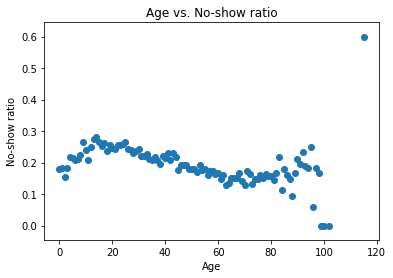

In [19]:
byage_ratio.head()
# make a scattor plot 
plt.scatter(byage_ratio['Age'], byage_ratio['no-show-ratio'])
# calculate the correlation coefficient between no-show ratio and age
np.corrcoef(byage_ratio['Age'], byage_ratio['no-show-ratio'])
plt.xlabel('Age')
plt.ylabel('No-show ratio')
plt.title('Age vs. No-show ratio')

#### The correlation coefficient between age and no-show ratio is -0.39, indicating week negative correlation between them. The scatter plot shows an outlier with age over 110 and no-show ratio value of ~0.6.  

Text(0.5,1,u'Age vs. No-show ratio')

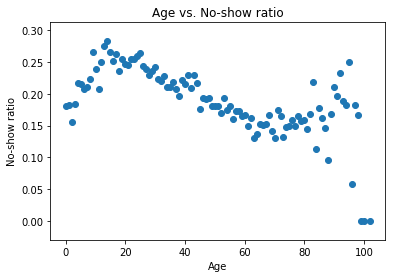

In [18]:
byage_ratio_filter = byage_ratio[byage_ratio['Age']<110]
plt.scatter(byage_ratio_filter['Age'], byage_ratio_filter['no-show-ratio'])
np.corrcoef(byage_ratio_filter['Age'], byage_ratio_filter['no-show-ratio'])
plt.xlabel('Age')
plt.ylabel('No-show ratio')
plt.title('Age vs. No-show ratio')

####  The correlation analysis was reconducted after removing the outlier.  The correlation coefficient is now -0.67, a strong negative correlation between Age and no-show-ratio, indicating that no-show ratio decreases when the age of the patient increases.  

#### 3. Is gender an import factor when predict is a patient will show up for their scheduled appointment ? 

,no-show-ratio,Gender
0,0.203149,F
1,0.199679,M


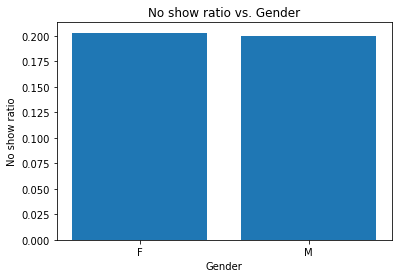

In [14]:
bygender_ratio = group_noshowratio(data_clean, 'Gender')
plt.bar(bygender_ratio['Gender'], bygender_ratio['no-show-ratio'])
plt.xlabel('Gender')
plt.ylabel('No show ratio')
plt.title('No show ratio vs. Gender')
bygender_ratio

#### The analysis shows that the no-show ratio is 0.203 for female patients and the no-show ratio is 0.199 for male patients.  A hypothesis test is then conducted to test whether the no-show-ratios for those two groups of patient are significantly different.
$$H_{0}: u_{f}=u_{m}$$
$$H_{A}: u_{f} \neq u_{m}$$
the significant level is set to 0.05

#### Independent two sample t-test

In [15]:
female = data_clean[data_clean['Gender']=='F']['no-show-value']
male = data_clean[data_clean['Gender']=='M']['no-show-value'] 

female_mean = female.mean()
female_n = len(female)
female_variance = np.sum((female - female_mean)**2)/(female_n-1)

male_mean = male.mean()
male_n = len(male)
male_variance = np.sum((male - male_mean)**2)/(male_n-1)

se_gender = np.sqrt(female_variance/female_n + male_variance/male_n)
t_gender = (female_mean-male_mean)/se_gender
dof_gender = female_n+male_n-2
print 't score:', t_gender
print 'degree of freedom:', dof_gender

t score: 1.37301995631
degree of freedom: 110524


#### The p-value is 0.17. So the result is not significant at p < 0.05, indicating that the no-show ratio for those two groups of patients (female and male) are not significantly different. Therefore, gender is not an import factor when predicting whether a patient will show up for their scheduled appointment.

#### 4. Is receiving SMS message an import factor when predicting is a patient will show up for their scheduled appointment ?

,no-show-ratio,SMS_received
0,0.167035,0
1,0.275745,1


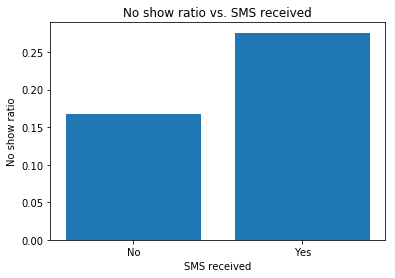

In [16]:
bysms_ratio = group_noshowratio(data_clean, 'SMS_received')
y_pos = np.arange(len(bysms_ratio['no-show-ratio']))
plt.bar(y_pos, bysms_ratio['no-show-ratio'], align='center')
plt.xticks(y_pos, ['No', 'Yes'])
plt.xlabel('SMS received')
plt.ylabel('No show ratio')
plt.title('No show ratio vs. SMS received')
bysms_ratio

#### The analysis shows that the no-show ratio is 0.167 for the patient receiving the SMS message and the no-show ratio is 0.276 for the patient not receiving the SMS message.  A hypothesis test is then conducted to test whether the no-show-ratios for those two groups of patient are significantly different.  
$$H_{0}: u_{sms}=u_{nosms}$$
$$H_{A}: u_{sms} \neq u_{nosms}$$
The significant level is set to 0.05

#### Independent two sample t-test 

In [17]:
sms=data_clean[data_clean['SMS_received']==1]['no-show-value']
nosms=data_clean[data_clean['SMS_received']==0]['no-show-value']

nosms_mean = nosms.mean()
nosms_n = len(nosms)
nosms_variance = np.sum((nosms - nosms_mean)**2)/(nosms_n-1)

sms_mean = sms.mean()
sms_n = len(sms)
sms_variance = np.sum((sms - sms_mean)**2)/(sms_n-1)

se = np.sqrt(nosms_variance/nosms_n + sms_variance/sms_n)
t = (sms_mean-nosms_mean)/se
dof = nosms_n + sms_n - 2
print 't score:', t
print 'degree of freedom:', dof

t score: 39.7411606488
degree of freedom: 110524


#### The p-value is < 0.0001. So the result is significant at p < 0.05, indicating that the no-show ratio for those two groups of patients (receiving SMS message or not receiving SMS messages) are significantly different.  Therefore,  receiving SMS message is an import factor when predicting whether a patient will show up for their scheduled appointment.

<a id='conclusions'></a>
## Conclusions

> The no-show appointments dataset is investigated in this report.  The relationship between no-show-ratio and three other variables (age, gender and whether received SMS messages) are investigated.  
<ul>
<li>The overall no-show ratio is 20.2% </li>
<li>There is a strong negative correlation (correlation efficient = -0.67) between age and no-show ratio</li>
<li>There is no significant difference between the no-show ratio of female and male, indicating gender is not an import factor when predicting whether a patient will show up for their scheduled appointment. </li>
<li>There is a significant difference between the no-show ratio of patients that have received the SMS messages and the patients that have not received the SMS messages, indicating whether or not received SMS messages is an import factor when predicting whether a patient will show up for their scheduled appointment. </li>
</ul>

> Discussion: The hypothesis performed in this analysis assumes that patients in different groups (e.g., female/male, received/not received SMS messages) should be randomly sampled from two independent populations. So more information about how this dataset was collected is needed in order to generalize the statistical conclusion to the population.